#### Bayesian Classifier
> The Naive Version

Imports

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import naive_bayes

#### Generate Samples

#### Classify

In [2]:

# Separate data for train X test
testSize = .9
isRepeatable = True

xTrain1, xTest1, yTrain1, yTest1 = train_test_split(sample1, np.zeros(nSamples), test_size=testSize, random_state=+isRepeatable)
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(sample2, np.ones(nSamples), test_size=testSize, random_state=+isRepeatable)

xTrain = np.vstack( (xTrain1, xTrain2) )
yTrain = np.append(yTrain1, yTrain2)

xTest = np.vstack( (xTest1, xTest2) )
yTest = np.append(yTest1, yTest2)

# Train
classifier = naive_bayes.GaussianNB()
yHat = classifier.fit(xTrain, yTrain).predict(xTest)

# Evaluate training result 
accuracy = np.sum(yHat == yTest) / yTest.size
# print("Number of mislabeled points out of a total %d points : %d" % (xTest.shape[0], (yTest != yHat).sum()))

nTest = yTest1.shape[0]
yHat1 = yHat[:nTest]
yHat2 = yHat[nTest:]

x1Hat = xTest1[yTest1 == yHat1]


NameError: name 'sample1' is not defined

#### Plot results

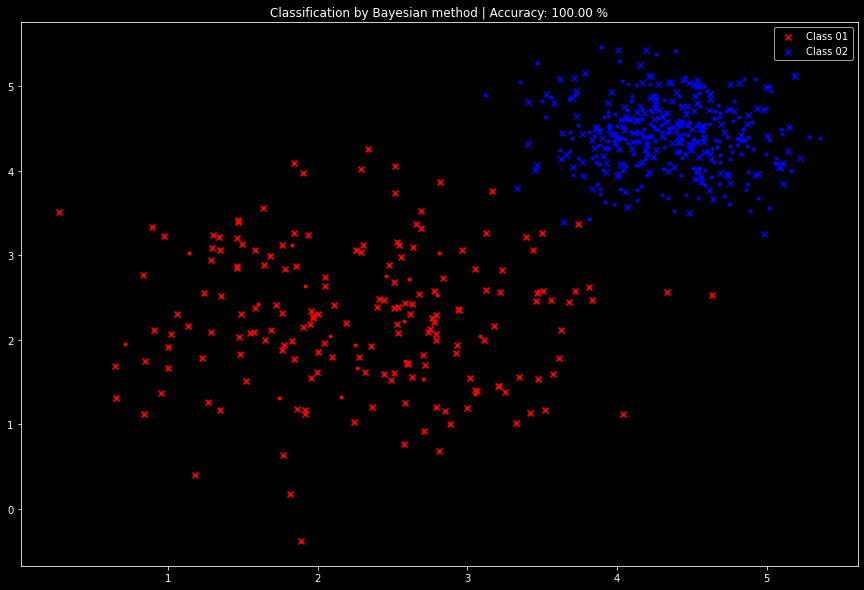

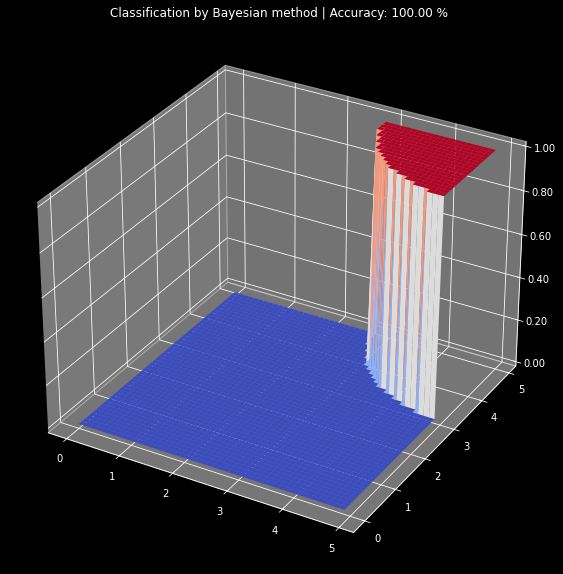

In [158]:
# Plot approximation
plt.scatter(x1Hat[:, 0], x1Hat[:, 1], color='r', marker='x')
plt.scatter(x2Hat[:, 0], x2Hat[:, 1], color='b', marker='x')

# Plot originals
plt.scatter(sample1[:, 0], sample1[:, 1], color='r', marker='.')
plt.scatter(sample2[:, 0], sample2[:, 1], color='b', marker='.')

plt.rcParams["figure.figsize"] = [15, 10]
title = 'Classification by Bayesian method | Accuracy: {:3.2f} %'.format(100 * accuracy)
plt.title(title)
plt.legend(['Class 01', 'Class 02'])
plt.show()

# Plot separation surface
gridAux = np.arange(0, 5, .1)

meshX, meshY = np.array(np.meshgrid(gridAux, gridAux))
meshAuxX = meshX.reshape( (meshX.size, 1) )
meshAuxY = meshY.reshape( (meshY.size, 1) )
meshAux = np.hstack( (meshAuxX, meshAuxY) )

Z = classifier.predict(meshAux)
Z = Z.reshape(meshX.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(meshX, meshY, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)
ax.set_title(title)
ax.zaxis.set_major_formatter('{x:.02f}')
plt.show()